# Семинар 1

In [1]:
import networkx as nx

## Создание и визуализация просты графов

## 1. 

1\.1\. Создать функцию генерирующую кольцевой граф из n узлов (n - параметр функции)

1\.2\. Визуализировать граф, построенный с помощью фукнции из задания 1. 

Документация:
* https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
* https://networkx.github.io/documentation/stable/reference/drawing.html


In [2]:
def mygr(n):
    g = nx.cycle_graph(n)
    return nx.draw_shell(g)

In [3]:
mygr(8)

## 2. 

2\.1\. Построить квадратную решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.

2\.2\. Реализовать собственную функцию создания квадратной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.

2\.3\. Реализовать собственную функцию создания квадратной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.

2\.4\. Модифицировать функцию 2\.2\. так, чтобы рештку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

2\.5-2\.8 Аналогичные задачи для треугольных решеток.

2\.9-2\.12\* Аналогичные задачи для гексогональных решеток.

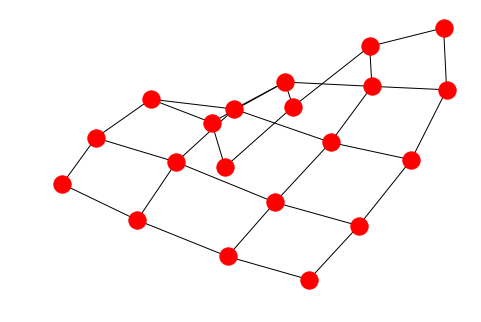

In [5]:
#2.1
G = nx.grid_graph(dim=[5,4])
nx.draw(G)

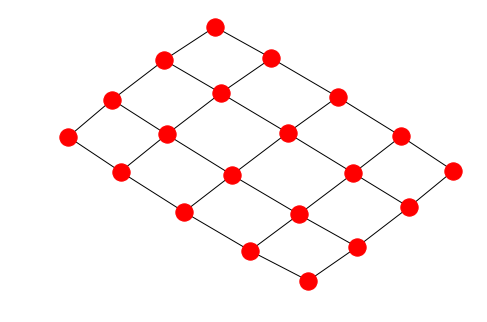

In [17]:
#2.2
def mygrid22(n, m):
    G = nx.Graph()
    k = 0
    for i in range(n):
        for j in range(m):
            G.add_node(k, pos=(i, j))
            if (k != 0 and j != 0): G.add_edge(k-1, k)  #горизонтальные связи
            if i != 0: G.add_edge(k, k - m) #вертикальные связи
            k += 1    
    return nx.draw(G)

mygrid22(5, 4)

{0: (0, 0),
 1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (1, 0),
 5: (1, 1),
 6: (1, 2),
 7: (1, 3),
 8: (2, 0),
 9: (2, 1),
 10: (2, 2),
 11: (2, 3),
 12: (3, 0),
 13: (3, 1),
 14: (3, 2),
 15: (3, 3),
 16: (4, 0),
 17: (4, 1),
 18: (4, 2),
 19: (4, 3)}

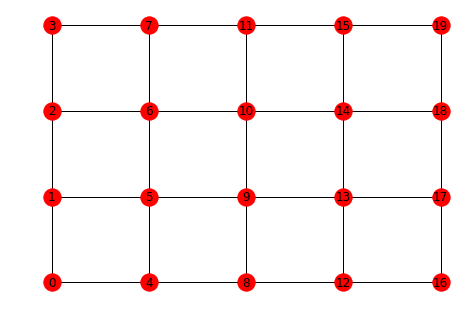

In [11]:
#2.3
def mygrid23(n, m):
    G = nx.Graph()
    k = 0
    mapping = {}
    for i in range(n):
        for j in range(m):
            mapping[k] = '('+str(j)+';'+str(i)+')' #новый элемент словаря
            G.add_node(k, pos=(i, j))
            if (k != 0 and j != 0): G.add_edge(k-1, k) #горизонтальные связи
            if i != 0: G.add_edge(k, k - m) #вертикальные связи
            k += 1 
#     G = nx.relabel_nodes(G, mapping) #новые названия
    position = nx.get_node_attributes(G, 'pos') #правильная решетка
    nx.draw(G, pos = position, with_labels = True)
    return position

mygrid23(5, 4)

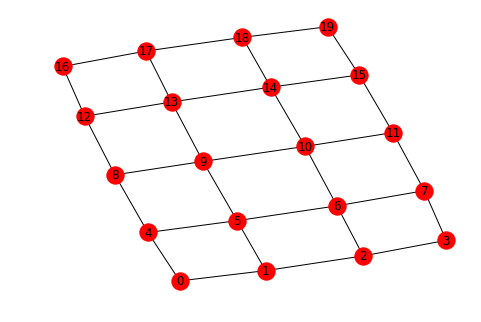

In [8]:
#2.4
def mygrid24(n, m, a = 0, b = 0):
    G = nx.Graph()
    k = 0
    for i in range(n):
        for j in range(m):
            G.add_node(k, pos=(i, j))
            if (k != 0 and j != 0): G.add_edge(k-1, k)  #горизонтальные связи
            if i != 0: G.add_edge(k, k - m) #вертикальные связи
            k += 1 
            if (a == 1) and (k != 0) and ((k+1) % m == 0): G.add_edge(k+1-m, k) #0-3, 4-7 и тд
            if (b == 1) and (i == n-1): G.add_edge(k-1, k-1+m-n*m) #0-16, 1-17 и тд
    return nx.draw(G, with_labels = True)

mygrid24(5, 4, 0, 0)

## 3. 

3\.
Граф «u,v цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длинной u и v соответственно (см.рис). 

__1,2 цветок:__
![1,2 цветок](1_2_fl.png "1,2 цветок")

__2,2 цветок:__
![2,2 цветок](2_2_fl.png "2,2 цветок")


3\.1\. Релизовать функцию построения 1,2 цветка. Функция принимает один целочисленный параметр n - количество шагов построения. 

Для построенного граафа 1.2 цветка получить:

3\.2\. Количество узлов, количество связей, среднюю степень узла.

3\.3\. Визуализацию графа (с указанием идентификаторов узлов).

3\.4\. Степень каждого узла и сохранить информацию о ней в самом узле.

3\.5\. Визуализацию графа, в котрой размер узла определяется его степенью (с указанием идентификаторов узлов).

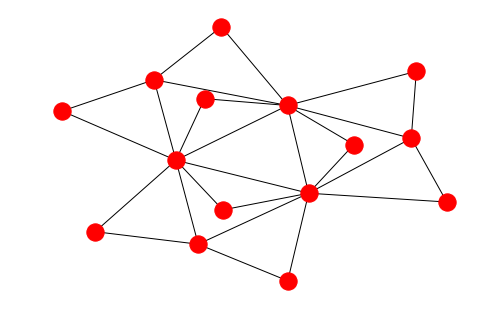

In [11]:
def triangles(n):
    G = nx.complete_graph(3)
    k = 0
    while n != 1:
        T = G.copy()
        for v in T.edges:
            G.add_node(k+3)
            G.add_edge(v[0], k+3)
            G.add_edge(v[1], k+3)
            k += 1
        n -= 1
    return nx.draw(G, with_lables = True)

triangles(3)

Количество узлов: 15 , количество связей: 27 , средняя степень узла: 3.6


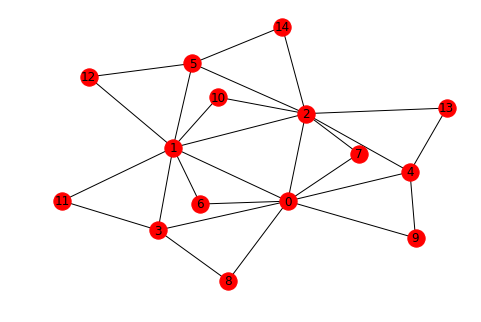

In [12]:
def tr(n):
    G = nx.path_graph(3)
    G.add_edge(0, 2)
    k = 0
    while n != 1:
        T = G.copy()
        for v in T.edges:
            G.add_node(k+3)
            G.add_edge(v[0], k+3)
            G.add_edge(v[1], k+3)
            k += 1
        n -= 1
    #3.2
    countNodes = len(G.nodes())
    countEdges = len(G.edges())
    s = 0
    for i in range(len(G.degree)):
        s += G.degree[i]
    r = s/countNodes
    print('Количество узлов:', countNodes, ', количество связей:', countEdges, ', средняя степень узла:', r)
    3.3
    mapping = {}
    for t in range(1, countNodes+1):
        mapping[t] = str(t)#+'; k = '+str(G.degree[t-1]) #новый элемент словаря        
    G = nx.relabel_nodes(G, mapping)
    return nx.draw(G, with_labels = True)

tr(3)

# 4. 

Датасеты с сетями:

http://networkrepository.com

http://konect.uni-koblenz.de

https://snap.stanford.edu/data/

---

https://networkdata.ics.uci.edu/resources.php

https://kateto.net/2016/05/network-datasets/


Документация:
* https://networkx.github.io/documentation/stable/reference/readwrite/index.html



# 4.

Для построенного граафа 1.2 цветка получить:

4\.1 Значение коэфициента кластеризации каждого узла и сохранить информацию о ней в самом узле.

4\.2 Визуализацию графа, в котрой размер узла определяется его коэффициентом кластреизации.

4\.5 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации.

4\.6 Визуализацию графа, в котрой коэффициентом кластреизации демонстрируется в подписи к узлу.

4\.7 Среднее значение коэффицента кластеризации для всего графа. (? разные)

# 5.

Для построенного граафа 1.2 цветка получить:

4\.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество\_узлов\_с\_данной\_степенью), картежи в списке отсортированы по возрастанию степени.

4\.2 График распределения степеней узлов.4

4\.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).

## 6.

Для построенного граафа 1.2 цветка получить:

5\.1\. Два произвольных узла и кратчайший путь между ними.

5\.2\. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.

5\.3\. Средний кратчайший путь для всего графа.

5\.4\. Диаметр графа.

## 7.

7\. Релизовать функцию построения u,v цветка. Функция принимает на вход 3 параметра: u – длина 1го пути при замене связи; v – длина 2го пути при замене связи; n - количество шагов построения. 

In [ ]:
ф